## Intro
My name is Richard Diamond and I am a sophomore at Tufts. Prep Baseball Report has given me 3 questions for a technical assessment. In this notebook, I will answer them and explain my code.

## Importing Packages

In [112]:
!pip install pybaseball

In [113]:
import numpy as np
import pandas as pd

## Question 1 - Relationship between OBP and SLG
Is there a relationship between a player's on-base percentage (OBP) and their slugging
percentage (SLG)? Create a scatter plot to show the relationship between these
variables. Does this relationship hold for all players or only certain types of hitters?
Explain your findings.

### Gather Data

In [114]:
from pybaseball import batting_stats
df = batting_stats(2022)

df.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246,0.609,404,0.169,0.287,0.305,0.706,0.463,11.2
5,11493,2022,Manny Machado,SDP,29,150,578,644,172,102,...,112.4,219,0.490,447,0.126,0.243,0.264,0.447,0.338,6.6
6,9777,2022,Nolan Arenado,STL,31,148,557,620,163,90,...,111.4,190,0.389,489,0.155,0.241,0.265,0.445,0.339,7.2
2,9218,2022,Paul Goldschmidt,STL,34,151,561,651,178,102,...,112.3,200,0.469,426,0.196,0.295,0.261,0.482,0.367,8.0
4,5361,2022,Freddie Freeman,LAD,32,159,612,708,199,129,...,112.3,248,0.480,517,0.122,0.206,0.313,0.538,0.403,6.5


### Plot OBP vs. SLG

Correlation Coefficient - 0.58


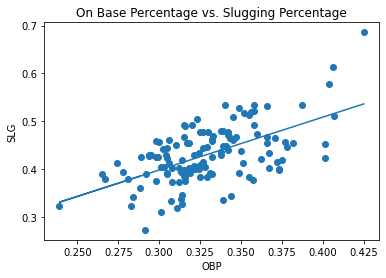

In [116]:
import matplotlib.pyplot as plt
plt.scatter(df['OBP'], df['SLG'])
plt.title('On Base Percentage vs. Slugging Percentage')
plt.xlabel('OBP')
plt.ylabel('SLG')

#create equation for trendline
z = np.polyfit(df['OBP'], df['SLG'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(df['OBP'], p(df['OBP']))

#find r^2
cc = np.corrcoef(df['OBP'], df['SLG'])
print('Correlation Coefficient -', round(cc[0][1],2))

The correlation coefficient value between these two factors is roughly 0.584. This indicates a relationship between the two factors, which makes sense, as guys who get a high number of base hits will have those hits contribute to both their OBP and SLG. Next, I wanted to take a look at whether this relationship holds for different types of batters.

### Taking a look at the relationship for free-swingers
One difference between OBP and slugging is that OBP factors in walks, while SLG does not. I wanted to try to filter for players who had a more free-swinging approach and observe that relationship. I chose to do this and not filter by OBP because this would bias my data towards better players. I wanted to include all types of players to get a more accurate representation of the sample.

In [117]:
#find the median swing rate
median_swingrate = df['Swing%'].median()
print(median_swingrate)

0.48050000000000004


In [118]:
#Keep data for above average swing rate players
df2 = df[df['Swing%'] > .48]
df2

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
5,11493,2022,Manny Machado,SDP,29,150,578,644,172,102,...,112.4,219,0.490,447,0.126,0.243,0.264,0.447,0.338,6.6
6,9777,2022,Nolan Arenado,STL,31,148,557,620,163,90,...,111.4,190,0.389,489,0.155,0.241,0.265,0.445,0.339,7.2
4,5361,2022,Freddie Freeman,LAD,32,159,612,708,199,129,...,112.3,248,0.480,517,0.122,0.206,0.313,0.538,0.403,6.5
26,11739,2022,J.T. Realmuto,PHI,31,139,504,562,139,86,...,110.4,182,0.467,390,0.155,0.269,0.275,0.463,0.351,6.6
53,18314,2022,Dansby Swanson,ATL,28,162,640,696,177,119,...,109.6,213,0.461,462,0.149,0.288,0.257,0.461,0.337,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,11342,2022,Jesus Aguilar,- - -,32,129,464,507,109,74,...,108.1,126,0.354,356,0.173,0.297,0.240,0.393,0.298,-0.6
112,10324,2022,Marcell Ozuna,ATL,31,124,470,507,106,64,...,113.9,154,0.438,352,0.156,0.289,0.256,0.478,0.337,-0.7
109,11737,2022,Nick Castellanos,PHI,30,136,524,558,138,98,...,110.1,137,0.346,396,0.110,0.280,0.250,0.395,0.302,-0.3
116,2434,2022,Nelson Cruz,WSN,41,124,448,507,105,79,...,113.8,153,0.457,335,0.127,0.277,0.241,0.399,0.320,-0.9


Correlation Coefficient - 0.68


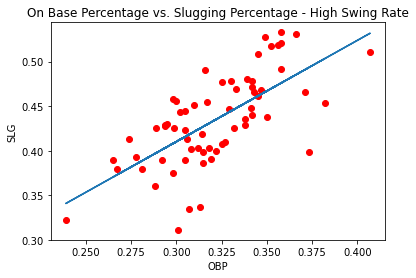

In [119]:
#plot new data
plt.scatter(df2['OBP'], df2['SLG'], color = 'red')
plt.title('On Base Percentage vs. Slugging Percentage - High Swing Rate')
plt.xlabel('OBP')
plt.ylabel('SLG')

#create equation for trendline
z = np.polyfit(df2['OBP'], df2['SLG'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(df2['OBP'], p(df2['OBP']))

#find r^2
cc = np.corrcoef(df2['OBP'], df2['SLG'])
print('Correlation Coefficient -', round(cc[0][1],2))

The above plot and correlation coefficient value show that the relationship is stronger for players who swing more. This is likely because of the fact that these players walk less, and thus their OBP is more tied to the amount of hits they get. Next, I wanted to try and understand the relationship for players who swing less than average.

In [120]:
#Keep data for below average swing rate players
df3 = df[df['Swing%'] < .48]
df3.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246,0.609,404,0.169,0.287,0.305,0.706,0.463,11.2
2,9218,2022,Paul Goldschmidt,STL,34,151,561,651,178,102,...,112.3,200,0.469,426,0.196,0.295,0.261,0.482,0.367,8.0
50,12916,2022,Francisco Lindor,NYM,28,161,630,706,170,114,...,110.7,207,0.411,504,0.154,0.254,0.254,0.427,0.331,6.3
1,19556,2022,Yordan Alvarez,HOU,25,135,470,561,144,76,...,117.4,222,0.598,371,0.165,0.256,0.329,0.672,0.462,7.0
3,5417,2022,Jose Altuve,HOU,32,141,527,604,158,91,...,109.8,130,0.295,441,0.173,0.240,0.269,0.440,0.354,6.4


Correlation Coefficient - 0.6


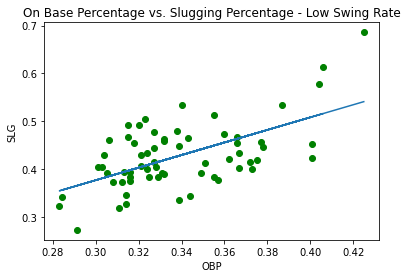

In [121]:
#plot new data
plt.scatter(df3['OBP'], df3['SLG'], color = 'green')
plt.title('On Base Percentage vs. Slugging Percentage - Low Swing Rate')
plt.xlabel('OBP')
plt.ylabel('SLG')

#create equation for trendline
z = np.polyfit(df3['OBP'], df3['SLG'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(df3['OBP'], p(df3['OBP']))

#find r^2
cc = np.corrcoef(df3['OBP'], df3['SLG'])
print('Correlation Coefficient -', round(cc[0][1], 2))

This relationship between OBP and SLG for players who swing less appears to be a little weaker than that of free-swinging players. This makes sense, because these players are more patient, leading them to be more likely to walk and have their walks contribute to OBP, but not SLG.

## Question 2 - Which team had the best offense?
Which team had the best offense in the 2022 MLB season? To answer this question, you
should consider statistics such as runs scored, batting average, on-base percentage,
and slugging percentage. How does the performance of the top team compare to that of
the average team?

In [122]:
from pybaseball import team_batting
batting = team_batting(2022)
batting

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,22,2022,LAD,29,2326,5526,6247,1418,850,325,...,112.5,1760,0.418,4210,0.161,0.268,NaN,NaN,NaN,36.5
1,14,2022,TOR,28,2445,5555,6158,1464,945,307,...,118.4,1920,0.440,4361,0.161,0.267,NaN,NaN,NaN,28.3
2,16,2022,ATL,29,2259,5509,6082,1394,842,298,...,116.8,1756,0.434,4048,0.148,0.278,NaN,NaN,NaN,25.9
3,9,2022,NYY,29,2342,5422,6172,1308,821,225,...,119.8,1705,0.417,4091,0.177,0.287,NaN,NaN,NaN,35.6
4,28,2022,STL,28,2355,5496,6165,1386,878,290,...,114.4,1611,0.373,4322,0.168,0.272,NaN,NaN,NaN,33.8
5,25,2022,NYM,29,2340,5489,6176,1422,952,272,...,116.5,1603,0.370,4337,0.162,0.265,NaN,NaN,NaN,30.6
6,21,2022,HOU,29,2279,5409,6054,1341,830,284,...,117.4,1666,0.389,4287,0.156,0.258,NaN,NaN,NaN,28.0
7,26,2022,PHI,28,2327,5496,6077,1392,903,255,...,114.8,1714,0.410,4184,0.163,0.275,NaN,NaN,NaN,23.7
8,3,2022,BOS,29,2379,5539,6144,1427,908,352,...,117.9,1724,0.408,4230,0.160,0.277,NaN,NaN,NaN,18.3
9,23,2022,MIL,29,2363,5417,6122,1271,784,251,...,117.2,1586,0.396,4001,0.173,0.280,NaN,NaN,NaN,24.1


When trying to answer the question of who had the best offense, the naive solution would be to count who scored the most runs. We can answer this question with a simple sort.

In [123]:
runs = batting.sort_values(by = 'R', ascending = False)
runs.head()

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,22,2022,LAD,29,2326,5526,6247,1418,850,325,...,112.5,1760,0.418,4210,0.161,0.268,NaN,NaN,NaN,36.5
3,9,2022,NYY,29,2342,5422,6172,1308,821,225,...,119.8,1705,0.417,4091,0.177,0.287,NaN,NaN,NaN,35.6
2,16,2022,ATL,29,2259,5509,6082,1394,842,298,...,116.8,1756,0.434,4048,0.148,0.278,NaN,NaN,NaN,25.9
1,14,2022,TOR,28,2445,5555,6158,1464,945,307,...,118.4,1920,0.440,4361,0.161,0.267,NaN,NaN,NaN,28.3
4,28,2022,STL,28,2355,5496,6165,1386,878,290,...,114.4,1611,0.373,4322,0.168,0.272,NaN,NaN,NaN,33.8


By runs, the top offense in 2022 was the Dodgers, followed by the Yankees and Braves. However, this ignores park factors. So we can instead use wRC+, which normalizes for park factors.

In [124]:
wrc = batting.sort_values(by = 'wRC+', ascending = False)
wrc.head()

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,22,2022,LAD,29,2326,5526,6247,1418,850,325,...,112.5,1760,0.418,4210,0.161,0.268,NaN,NaN,NaN,36.5
1,14,2022,TOR,28,2445,5555,6158,1464,945,307,...,118.4,1920,0.440,4361,0.161,0.267,NaN,NaN,NaN,28.3
5,25,2022,NYM,29,2340,5489,6176,1422,952,272,...,116.5,1603,0.370,4337,0.162,0.265,NaN,NaN,NaN,30.6
3,9,2022,NYY,29,2342,5422,6172,1308,821,225,...,119.8,1705,0.417,4091,0.177,0.287,NaN,NaN,NaN,35.6
4,28,2022,STL,28,2355,5496,6165,1386,878,290,...,114.4,1611,0.373,4322,0.168,0.272,NaN,NaN,NaN,33.8


The Dodgers still have the top offense, but the number 2 and number 3 spots are now occupied by the Blue Jays and the Mets. I wanted to determine how much better the Dodgers were than all other teams.

In [125]:
print(wrc.iloc[0]['wRC+'])

119


Since the dodgers had a wRC+ of 119, they were 19% better than an average offense. Lastly, I wanted to confirm that the Dodgers were the best offensive team by looking at where they ranked in more traditional counting stats.

In [126]:
newDF = wrc.set_index('Team')

#filter for traditonal stats
newDF = newDF[['AVG', 'OBP', 'SLG', 'RBI', 'R']]

#get ranks of statistics
newDF = newDF.rank(ascending = False)

#show df
newDF.head()

,AVG,OBP,SLG,RBI,R
Team,,,,,
LAD,4.0,1.0,2.0,1.0,1.0
TOR,1.0,3.0,3.0,3.0,4.0
NYM,2.0,2.0,8.0,6.0,5.5
NYY,15.5,4.5,4.0,2.0,2.0
STL,10.0,4.5,7.0,5.0,5.5


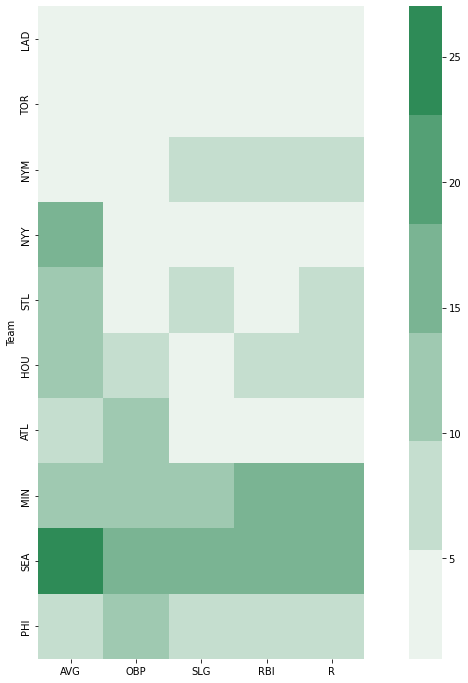

In [127]:
#Only consider teams in the top 10 of wRC+ to avoid cluttering visualization
top10 = newDF.head(10)

import seaborn as sns
#create a heatmap to visualize
ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(top10, square = True, cmap = sns.light_palette("seagreen"))


Lighter colors in this plot indicate a higher rank. Because of this, we see that the only two teams in the top tier of each category are the Dodgers and Blue Jays. Because of this, and the edge the Dodgers have in wRC+, I feel confident in saying that the Dodgers had the overall best offense in MLB in 2022.

## Question 3 - Defensive Shifts
How do defensive shifts affect a team's defensive performance? To answer this
question, you should analyze the relationship between the number of shifts a team
employs and their defensive statistics, such as fielding percentage and defensive runs
saved. Is there a correlation between the number of shifts and defensive performance?
Does this vary by team or by position?

In [128]:
from pybaseball import team_fielding
#grab fielding stats from 2022 season, will take about 5 mins to gather
fielding = team_fielding(2022)
fielding.head()

,teamIDfg,Season,Team,G,GS,Inn,PO,A,E,FE,...,60-90%,# 60-90%,90-100%,# 90-100%,rSZ,rCERA,rTS,FRM,OAA,RAA
0,9,2022,Yankees,2179,1458,13065.0,4355,1473,74,43,...,NaN,NaN,NaN,NaN,20,1,25,24.5,21,16
1,15,2022,Diamondbacks,2208,1458,12870.0,4290,1370,86,46,...,NaN,NaN,NaN,NaN,-15,3,33,-6.4,44,38
2,28,2022,Cardinals,2192,1458,12921.0,4307,1701,66,30,...,NaN,NaN,NaN,NaN,-8,3,11,-3.4,24,18
3,21,2022,Astros,2104,1458,13008.0,4336,1290,72,36,...,NaN,NaN,NaN,NaN,-1,0,44,-2.9,31,26
4,5,2022,Guardians,2134,1458,13104.0,4368,1444,97,41,...,NaN,NaN,NaN,NaN,3,2,22,3.7,19,15


I couldn't find how to quickly get statcast shift data from pybaseball, so I grabbed statcast shift frequencies by myself.

In [129]:
#gather statcast data
statcast2022 = pd.read_csv('/Users/richarddiamond/Desktop/personalProjects/statcast2022.csv')

#merge dataframes
fielding = pd.merge(fielding, statcast2022, on = 'Team')

Now, let's take a look at how traditional fielding stats correlate with statcast shift percentage.

Correlation Coefficient - 0.18


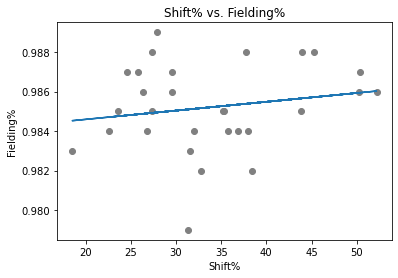

In [130]:
#plot new data
plt.scatter(fielding['%'], fielding['FP'], color = 'gray')
plt.title('Shift% vs. Fielding%')
plt.xlabel('Shift%')
plt.ylabel('Fielding%')

#create equation for trendline
z = np.polyfit(fielding['%'], fielding['FP'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(fielding['%'], p(fielding['%']))

#find r^2
cc = np.corrcoef(fielding['%'], fielding['FP'])
print('Correlation Coefficient -', round(cc[0][1], 2))

This relationship appears to be very weak, and the data seems to have a low r-squared as well. Now, let's take a look at how other traditional stats are affected by shift percentage.

Correlation Coefficient - 0.15


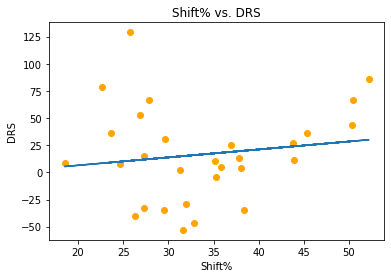

In [131]:
#plot new data
plt.scatter(fielding['%'], fielding['DRS'], color = 'orange')
plt.title('Shift% vs. DRS')
plt.xlabel('Shift%')
plt.ylabel('DRS')

#create equation for trendline
z = np.polyfit(fielding['%'], fielding['DRS'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(fielding['%'], p(fielding['%']))

#find r^2
cc = np.corrcoef(fielding['%'], fielding['DRS'])
print('Correlation Coefficient -', round(cc[0][1], 2))

Perhaps we can say there exists some polynomial fit here, but overall, the relationship looks weak once again. I also wanted to take a look at a statcast metric, Outs Abover Average.

Correlation Coefficient - 0.03


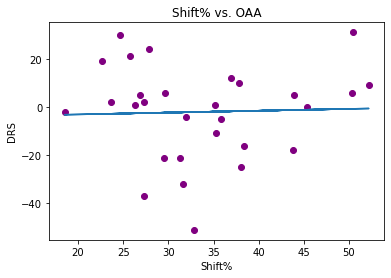

In [132]:
#plot new data
plt.scatter(fielding['%'], fielding['OAA'], color = 'Purple')
plt.title('Shift% vs. OAA')
plt.xlabel('Shift%')
plt.ylabel('DRS')

#create equation for trendline
z = np.polyfit(fielding['%'], fielding['OAA'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(fielding['%'], p(fielding['%']))

#find r^2
cc = np.corrcoef(fielding['%'], fielding['OAA'])
print('Correlation Coefficient -', round(cc[0][1], 2))

Once again, no relationship here. Lastly, I wanted to take a look at UZR to see if any important defensive metric has a relationship with shift %.

Correlation Coefficient - -0.36


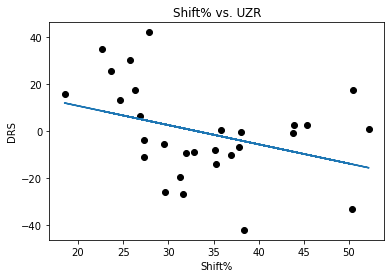

In [133]:
#plot new data
plt.scatter(fielding['%'], fielding['UZR'], color = 'black')
plt.title('Shift% vs. UZR')
plt.xlabel('Shift%')
plt.ylabel('DRS')

#create equation for trendline
z = np.polyfit(fielding['%'], fielding['UZR'] , 1)
p = np.poly1d(z)

#plot trendline
plt.plot(fielding['%'], p(fielding['%']))

#find r^2
cc = np.corrcoef(fielding['%'], fielding['UZR'])
print('Correlation Coefficient -', round(cc[0][1], 2))

This is the strongest relationship we've observed, and it is an inverse one. This could be because UZR takes into account the 'difficulty' of a play based on how far a defender ranges. The shift obviously changes defensive positioning and thus makes certain plays that would be easy with a normal defensive alignment difficult. Because of this, teams that shift often are likely to concede hits to vacated holes in the infield that appear to be easy plays, thus hurting team UZR.

## References
Thanks to pybaseball and Baseball Savant for the data used for this notebook.